In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
# null = open(os.devnull,'wb')
sys.version

'3.7.4 (default, Sep 11 2019, 11:24:51) \n[GCC 6.2.0]'

In [2]:
# Working directory containing DRG snATAC-seq and snRNA-seq data
work_dir = '/n/scratch3/users/x/xl266/scenic_plus/nucleus_accumbens_Mar25/'
tmp_dir = '/n/scratch3/users/x/xl266/tmp'

In [3]:
#make a directory for to store the processed scRNA-seq data.
if not os.path.exists(os.path.join(work_dir, 'scRNA')):
    os.makedirs(os.path.join(work_dir, 'scRNA'))

# Read in RNA AnnData

In [5]:
# Read in AnnData using scanpy
anndata_path = "/n/scratch3/users/p/pab1164/NAc/NAc_IdentsStored_MuSeurat.h5ad"
import scanpy as sc
adata = sc.read_h5ad(anndata_path)


In [6]:
adata

AnnData object with n_obs × n_vars = 41433 × 26145
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'percent.mito', 'Sample', 'tree.ident', 'Celltype', 'L2_clustering', 'RNA_snn_res.0.2', 'seurat_clusters', 'percent.Hbb', 'Identities'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable'
    layers: 'counts'

In [43]:
adata.obs['Identities'].value_counts()

D1_Alpha            9095
Oligodendrocytes    8300
D2_MSNs             7764
Astrocytes          7405
Microglia           3030
OPC                 3025
D1_Beta             2814
Name: Identities, dtype: int64

# ATAC

In [9]:
if not os.path.exists(os.path.join(work_dir, 'scATAC')):
    os.makedirs(os.path.join(work_dir, 'scATAC'))

In [145]:
import pandas as pd
pd.__version__

'1.3.5'

In [32]:
import pandas as pd
nucl_acc_atac_metadata_path = '/n/scratch3/users/x/xl266/scenic_plus/nucleus_accumbens_Mar25/data/nucleus_accumbens_metadata.csv'

In [33]:
nucl_acc_metadata_anchored_atac = pd.read_csv(nucl_acc_atac_metadata_path, index_col=0)
nucl_acc_metadata_anchored_atac

orig.ident  nCount_peaks  nFeature_peaks  TSS_fragments  \
AAACGAAAGAGAATTC-2       ATAC          8154            4018           3522   
AAACGAAAGTCCCTCT-1       ATAC          5833            2783           1809   
AAACGAACAACACGGA-1       ATAC          7384            3600           2476   
AAACGAACACCTGAAT-1       ATAC         14526            6605           4240   
AAACGAACAGGGAGTT-2       ATAC         10961            5090           3758   
...                       ...           ...             ...            ...   
TTTGTGTAGGTGAACC-1       ATAC          6666            3140           2832   
TTTGTGTCAACGACAG-2       ATAC          8106            3985           4405   
TTTGTGTCATGGAGGT-1       ATAC          6527            3229           2123   
TTTGTGTTCACTACCC-2       ATAC          5771            2876           1838   
TTTGTGTTCACTAGCA-1       ATAC          7685            3758           3077   

                    DNase_sensitive_region_fragments  \
AAACGAAAGAGAATTC-2                              6145   
AAACGAAAGTCCCTCT-1                              3338   
AAACGAACAACACGGA-1                              4471   
AAACGAACACCTGAAT-1                              7591   
AAACGAACAGGGAGTT-2                              6406   
...                                              ...   
TTTGTGTAGGTGAACC-1                              4396   
TTTGTGTCAACGACAG-2                              7362   
TTTGTGTCATGGAGGT-1                              3830   
TTTGTGTTCACTACCC-2                              3154   
TTTGTGTTCACTAGCA-1                              5472   

                    enhancer_region_fragments  promoter_region_fragments  \
AAACGAAAGAGAATTC-2                       3679                       2428   
AAACGAAAGTCCCTCT-1                       1669                       1524   
AAACGAACAACACGGA-1                       2452                       2044   
AAACGAACACCTGAAT-1                       3989                       3499   
AAACGAACAGGGAGTT-2                       3308                       3178   
...                                       ...                        ...   
TTTGTGTAGGTGAACC-1                       2148                       2452   
TTTGTGTCAACGACAG-2                       4906                       2918   
TTTGTGTCATGGAGGT-1                       2062                       1735   
TTTGTGTTCACTACCC-2                       1628                       1483   
TTTGTGTTCACTAGCA-1                       3499                       2154   

                    on_target_fragments  blacklist_region_fragments  \
AAACGAAAGAGAATTC-2                 8764                          49   
AAACGAAAGTCCCTCT-1                 4216                          12   
AAACGAACAACACGGA-1                 5900                          12   
AAACGAACACCTGAAT-1                 9790                          31   
AAACGAACAGGGAGTT-2                 8181                          43   
...                                 ...                         ...   
TTTGTGTAGGTGAACC-1                 5718                          16   
TTTGTGTCAACGACAG-2                11164                          15   
TTTGTGTCATGGAGGT-1                 4963                          16   
TTTGTGTTCACTACCC-2                 4082                          12   
TTTGTGTTCACTAGCA-1                 7871                          54   

                    peak_region_fragments  ...  peaks_snn_res.0.3  \
AAACGAAAGAGAATTC-2                   4515  ...                  1   
AAACGAAAGTCCCTCT-1                   3077  ...                  1   
AAACGAACAACACGGA-1                   4001  ...                  4   
AAACGAACACCTGAAT-1                   7770  ...                  0   
AAACGAACAGGGAGTT-2                   5891  ...                  5   
...                                   ...  ...                ...   
TTTGTGTAGGTGAACC-1                   3573  ...                  6   
TTTGTGTCAACGACAG-2                   4530  ...                  0   
TTTGTGTCATGGAGGT-1    

In [36]:
cell_data = pd.DataFrame(nucl_acc_metadata_anchored_atac['Identities'])
cell_data['sample_id'] = 'nucl_acc'
cell_data

Identities sample_id
AAACGAAAGAGAATTC-2          D1_Alpha  nucl_acc
AAACGAAAGTCCCTCT-1           D2_MSNs  nucl_acc
AAACGAACAACACGGA-1           D1_Beta  nucl_acc
AAACGAACACCTGAAT-1           D2_MSNs  nucl_acc
AAACGAACAGGGAGTT-2  Oligodendrocytes  nucl_acc
...                              ...       ...
TTTGTGTAGGTGAACC-1         Microglia  nucl_acc
TTTGTGTCAACGACAG-2          D1_Alpha  nucl_acc
TTTGTGTCATGGAGGT-1           D2_MSNs  nucl_acc
TTTGTGTTCACTACCC-2           D2_MSNs  nucl_acc
TTTGTGTTCACTAGCA-1          D1_Alpha  nucl_acc

[3449 rows x 2 columns]

In [38]:
set(cell_data['Identities'])

{'Astrocytes',
 'D1_Alpha',
 'D1_Beta',
 'D2_MSNs',
 'Microglia',
 'OPC',
 'Oligodendrocytes'}

# Visualize topic modeling results

In [25]:
# If needed; used Mar 29 to replot UMAP w/o labels
import pickle
import dill
cistopic_obj = dill.load(open(os.path.join(work_dir, 'scATAC/nucl_acc_cistopic_obj.pkl'), 'rb'))



In [26]:
# Visualize topics
from pycisTopic.clust_vis import *
run_umap(cistopic_obj, target  = 'cell', scale=True)

In [3]:
import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=100, frameon=False, figsize=(5, 5), facecolor='white')


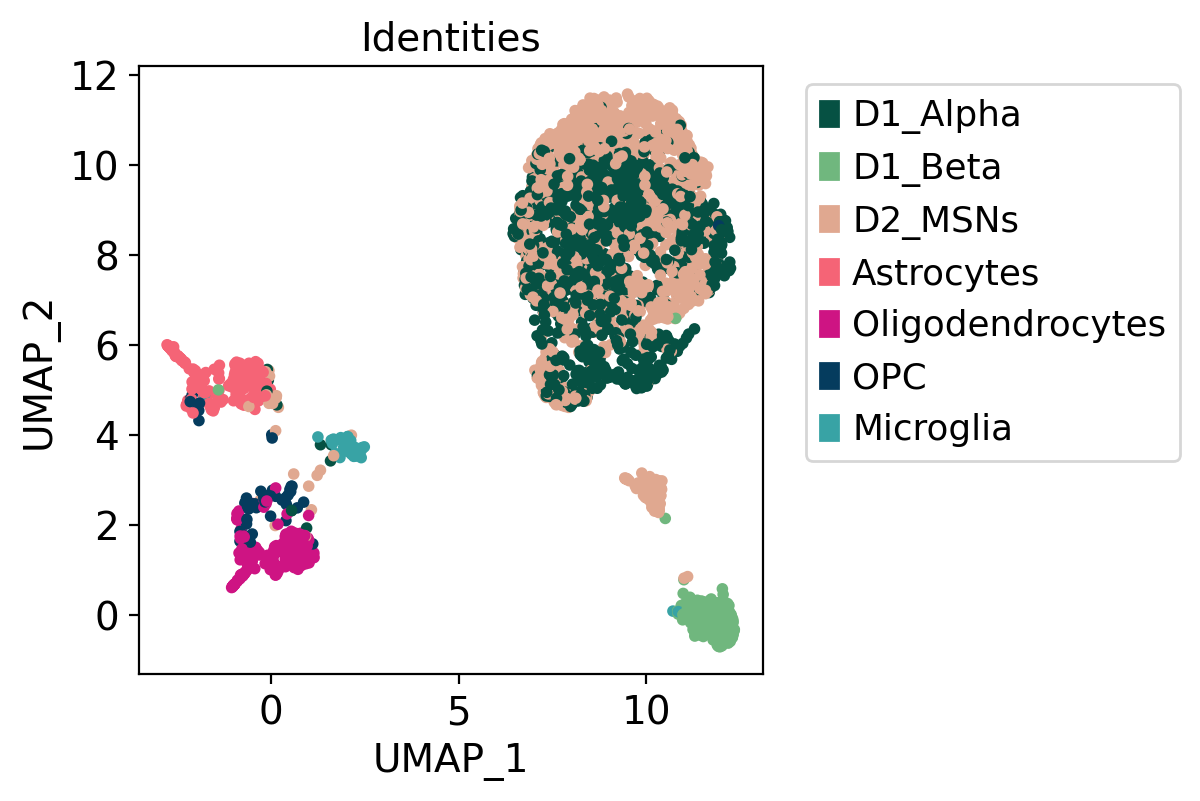

In [32]:
from pycisTopic.clust_vis import *

color_dict_specs = {
    'D1_Alpha': "#065143",
    'D1_Beta': "#70B77E",
    'D2_MSNs': "#E0A890",
    'Astrocytes': "#F56476",
    'Oligodendrocytes': "#CE1483",
    'OPC': "#053C5E" ,
    'Microglia': "#38A3A5",
}

color_dict = {}
color_dict['Identities'] = color_dict_specs

figure_size = (4, 4)


# Edited (one line) of plot_metadata() from clust_vis.py
# plot_cistopic_metadata_no_grid(cistopic_obj, reduction_name = 'UMAP', variables = ['Identities'], show_label = False, show_legend=True, figsize=figure_size, color_dictionary=color_dict)

plot_cistopic_metadata_no_grid(cistopic_obj, reduction_name = 'UMAP', variables = ['Identities'], show_label = False, show_legend=True, figsize=figure_size, color_dictionary=color_dict,
             save = os.path.join('/n/scratch3/users/x/xl266/nucleus_accumbens_final_plots/fig_s2', 'topics_umap_nolabels_nogrid_newcolors.pdf'))




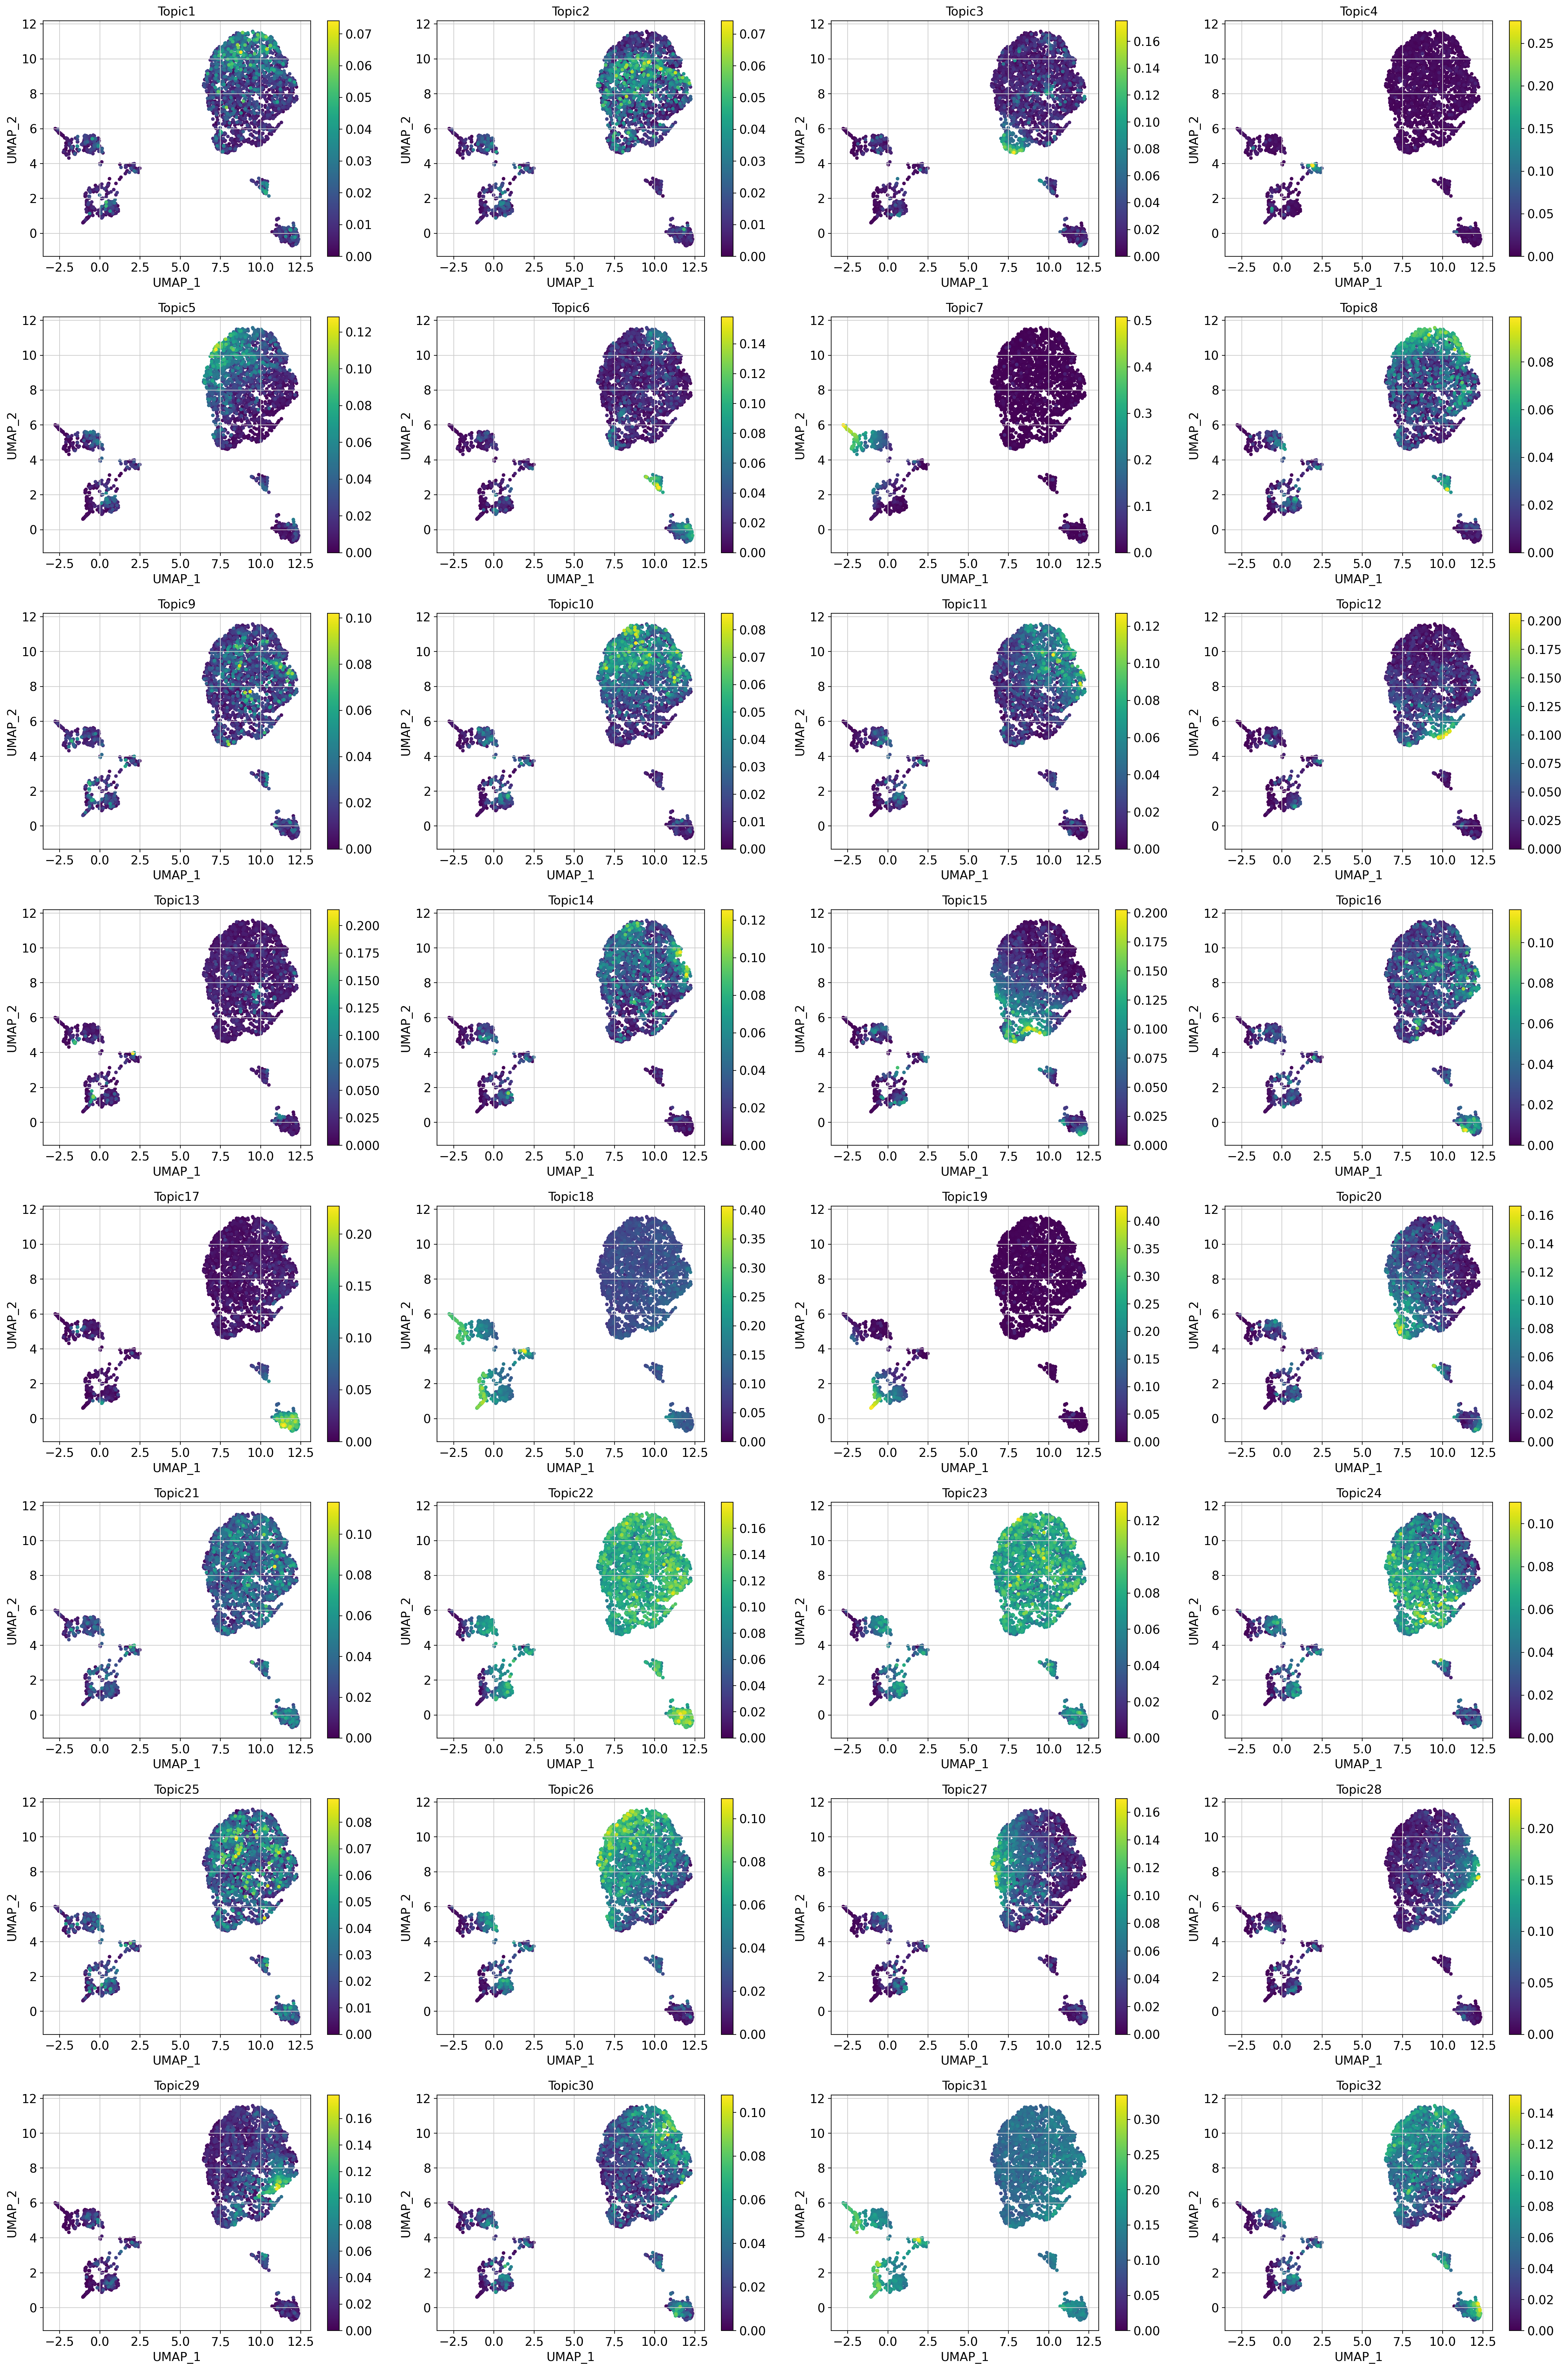

In [8]:
# plot cell-topic probabilities
plot_topic(cistopic_obj, reduction_name = 'UMAP', num_columns = 4, save = os.path.join(work_dir, 'scATAC/topics_cell_topic_prob_umap.pdf'))

# SCENIC+ postprocessing and plotting

In [3]:
import os
save_dir = '/path/to/save/'

In [5]:
import scenicplus
scenicplus.__version__

'0.1.dev446+g5cf2469'

In [6]:
import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')




In [3]:
# Load SCENIC+ results
import dill
scplus_obj = dill.load(open(os.path.join(work_dir, 'scenicplus/scplus_obj.pkl'), 'rb'))
scplus_obj

SCENIC+ object with n_cells x n_genes = 688 x 26145 and n_cells x n_regions = 688 x 96174
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable'
	metadata_cell:'Identities'
	menr:'CTX_topics_otsu_All', 'CTX_topics_otsu_No_promoters', 'DEM_topics_otsu_All', 'DEM_topics_otsu_No_promoters', 'CTX_topics_top_3_All', 'CTX_topics_top_3_No_promoters', 'DEM_topics_top_3_All', 'DEM_topics_top_3_No_promoters', 'CTX_DARs_All', 'CTX_DARs_No_promoters', 'DEM_DARs_All', 'DEM_DARs_No_promoters'
	dr_cell:'eRegulons_UMAP', 'eRegulons_tSNE'

In [4]:
scplus_obj.cell_names

Index(['Astrocytes.0', 'Astrocytes.1', 'Astrocytes.2', 'Astrocytes.3',
       'Astrocytes.4', 'Astrocytes.5', 'Astrocytes.6', 'Astrocytes.7',
       'Astrocytes.8', 'Astrocytes.9',
       ...
       'Oligodendrocytes.38', 'Oligodendrocytes.39', 'Oligodendrocytes.40',
       'Oligodendrocytes.41', 'Oligodendrocytes.42', 'Oligodendrocytes.43',
       'Oligodendrocytes.44', 'Oligodendrocytes.45', 'Oligodendrocytes.46',
       'Oligodendrocytes.47'],
      dtype='object', length=688)

In [5]:
# Sanity check
scplus_obj.metadata_cell['Identities'].value_counts()

D2_MSNs             270
D1_Alpha            248
Astrocytes           54
Oligodendrocytes     48
D1_Beta              44
Microglia            12
OPC                  12
Name: Identities, dtype: int64

In [6]:
# Simplify and filter output
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


In [7]:
# eRegulon enrichment scores
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(work_dir, 'scenicplus/region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(work_dir, 'scenicplus/gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)

In [8]:
# eRegulon dimensionality reduction
from scenicplus.dimensionality_reduction import run_eRegulons_tsne, run_eRegulons_umap
run_eRegulons_umap(
    scplus_obj = scplus_obj,
    auc_key = 'eRegulon_AUC_filtered',
    reduction_name = 'eRegulons_UMAP', #overwrite previously calculated UMAP
)
run_eRegulons_tsne(
    scplus_obj = scplus_obj,
    auc_key = 'eRegulon_AUC_filtered',
    reduction_name = 'eRegulons_tSNE', #overwrite previously calculated tSNE
)

In [10]:
# Check t-SNE coordinates
# scplus_obj
scplus_obj.dr_cell['eRegulons_tSNE']

tSNE_1     tSNE_2
Astrocytes.0         8.161982 -26.712444
Astrocytes.1         6.624824 -31.841599
Astrocytes.2         6.996325 -29.698696
Astrocytes.3         6.364358 -30.736523
Astrocytes.4         5.129140 -31.193611
...                       ...        ...
Oligodendrocytes.43 -6.145783 -41.051418
Oligodendrocytes.44 -7.621888 -42.226849
Oligodendrocytes.45 -6.333477 -44.995373
Oligodendrocytes.46 -6.317905 -41.831348
Oligodendrocytes.47 -6.668008 -43.394794

[688 rows x 2 columns]

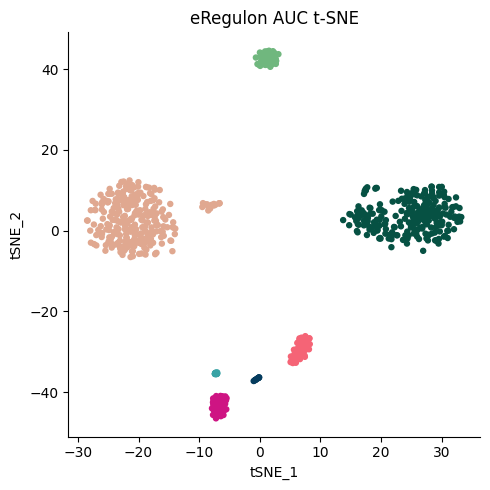

In [11]:
# Visualize UMAP, tSNE
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#specify color_dictionary

color_dict = {
    'D1_Alpha': "#065143",
    'D1_Beta': "#70B77E",
    'D2_MSNs': "#E0A890",
    'Astrocytes': "#F56476",
    'Oligodendrocytes': "#CE1483",
    'OPC': "#053C5E" ,
    'Microglia': "#38A3A5",
}


fig, axs = plt.subplots(ncols=1, figsize = (5, 5))
# https://stackoverflow.com/questions/52273546/matplotlib-typeerror-axessubplot-object-is-not-subscriptable

plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs,
    reduction_name = 'eRegulons_tSNE',
    variable = 'Identities', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
    color_dictionary={'Identities': color_dict},
    dot_size = 13,
    text_size = 15,
    show_label = False
)
fig.tight_layout()
sns.despine(ax = axs) #remove top and right edge of axis border
plt.grid(visible=False)
plt.title('eRegulon AUC t-SNE')
# plt.savefig('/path/to/save.pdf', format='pdf')


plt.show()



In [9]:
# "generate pseudobulk gene expression and region accessibility data, per celltype, 
# to limit the amount of noise for the correlation calculation."

from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks

generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'Identities',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Gene_based')
generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'Identities',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based')

TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'Identities',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'Identities',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

/home/xl266/jupytervenv_scenicplus/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


# Figure 2

## AUC vs. TF expression plots

In [13]:
import os
fig2_savedir = '/path/to/save/'

In [14]:
from scenicplus.cistromes import *
%matplotlib inline
import seaborn as sns
sns.set_style("white")

color_dict = {
    'D1_Alpha': "#065143",
    'D1_Beta': "#70B77E",
    'D2_MSNs': "#E0A890",
    'Astrocytes': "#F56476",
    'Oligodendrocytes': "#CE1483",
    'OPC': "#053C5E" ,
    'Microglia': "#38A3A5",
}

In [15]:
import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')





In [16]:
import matplotlib.pyplot as plt

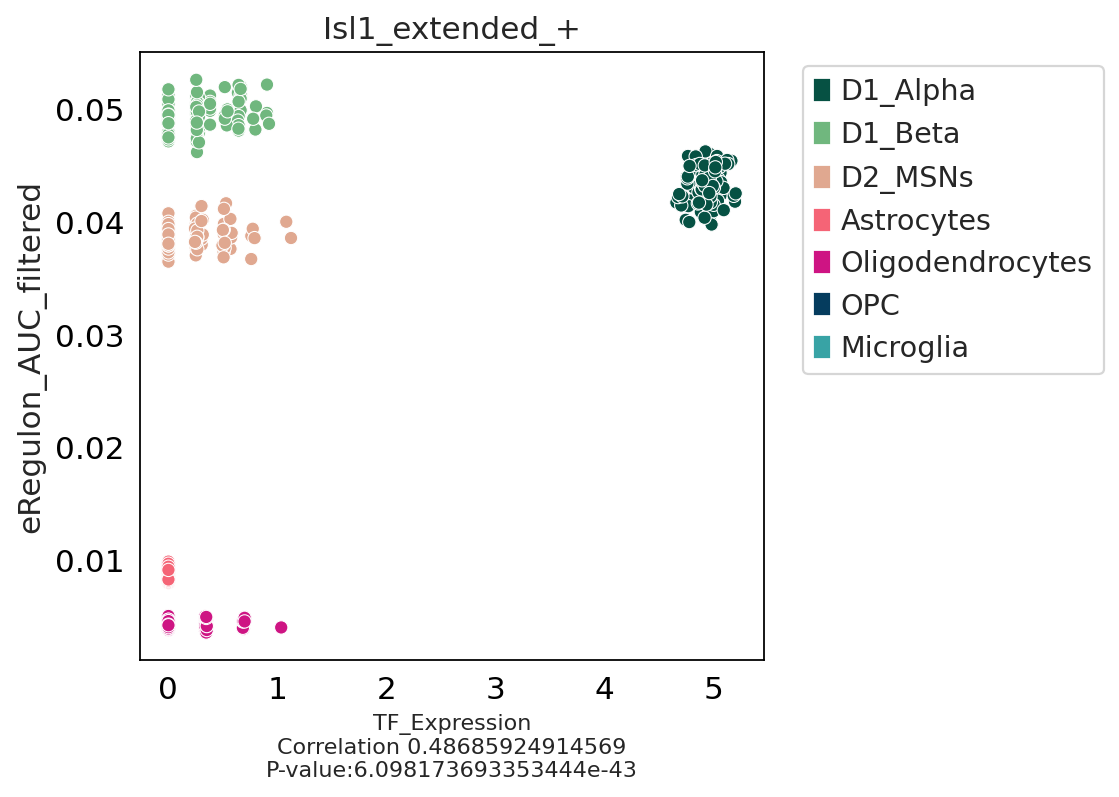

In [24]:
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))


prune_plot(scplus_obj,
           'Isl1_extended_+',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)

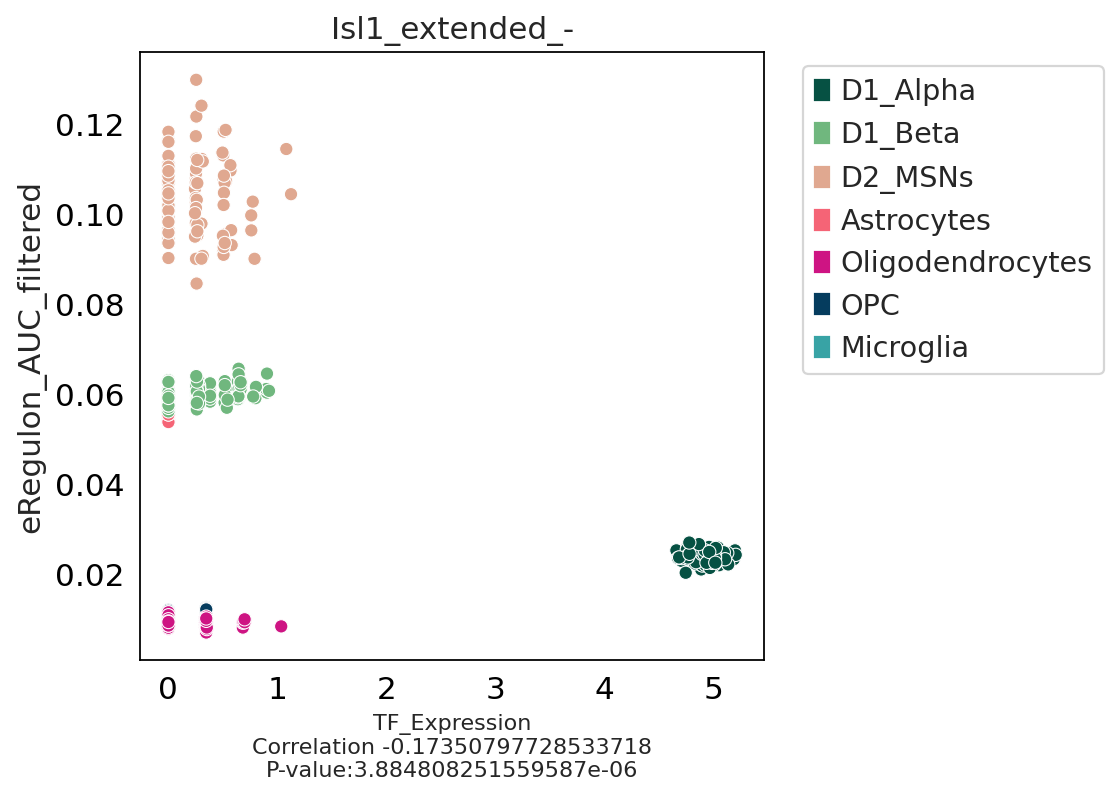

In [21]:
plt.close()
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))


prune_plot(scplus_obj,
           'Isl1_extended_-',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)

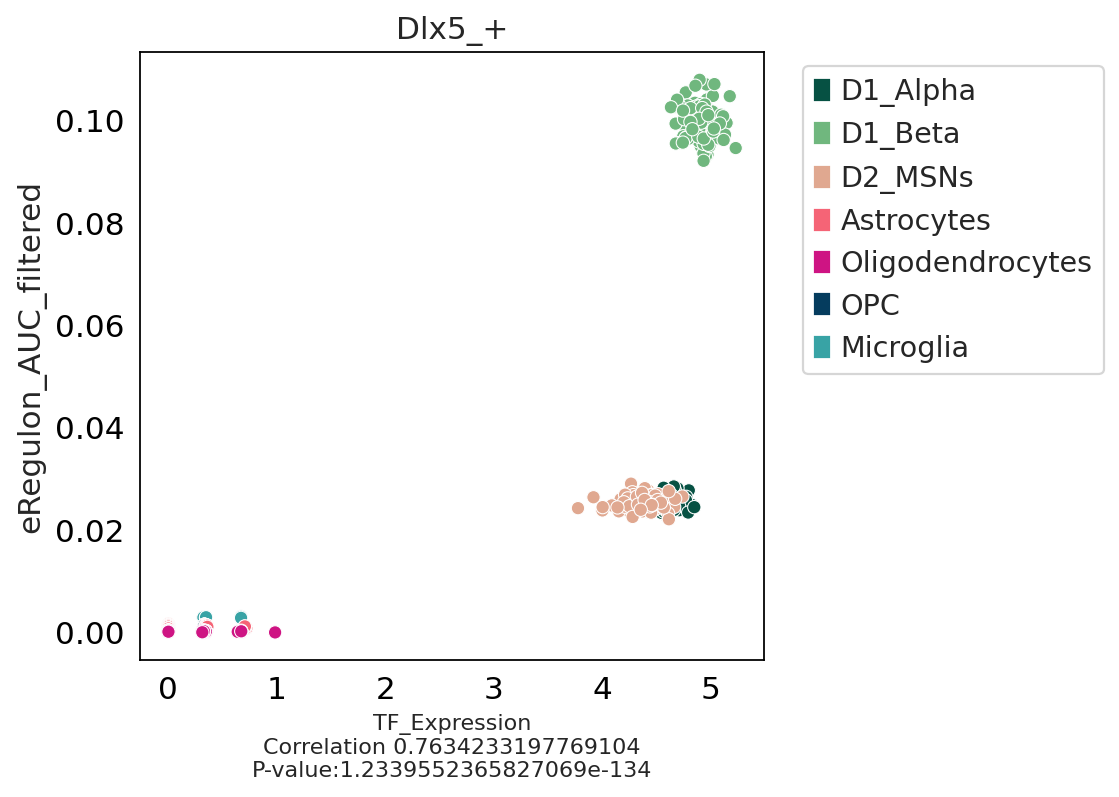

In [26]:
# D1 Beta
plt.close()
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))


prune_plot(scplus_obj,
           'Dlx5_+',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)

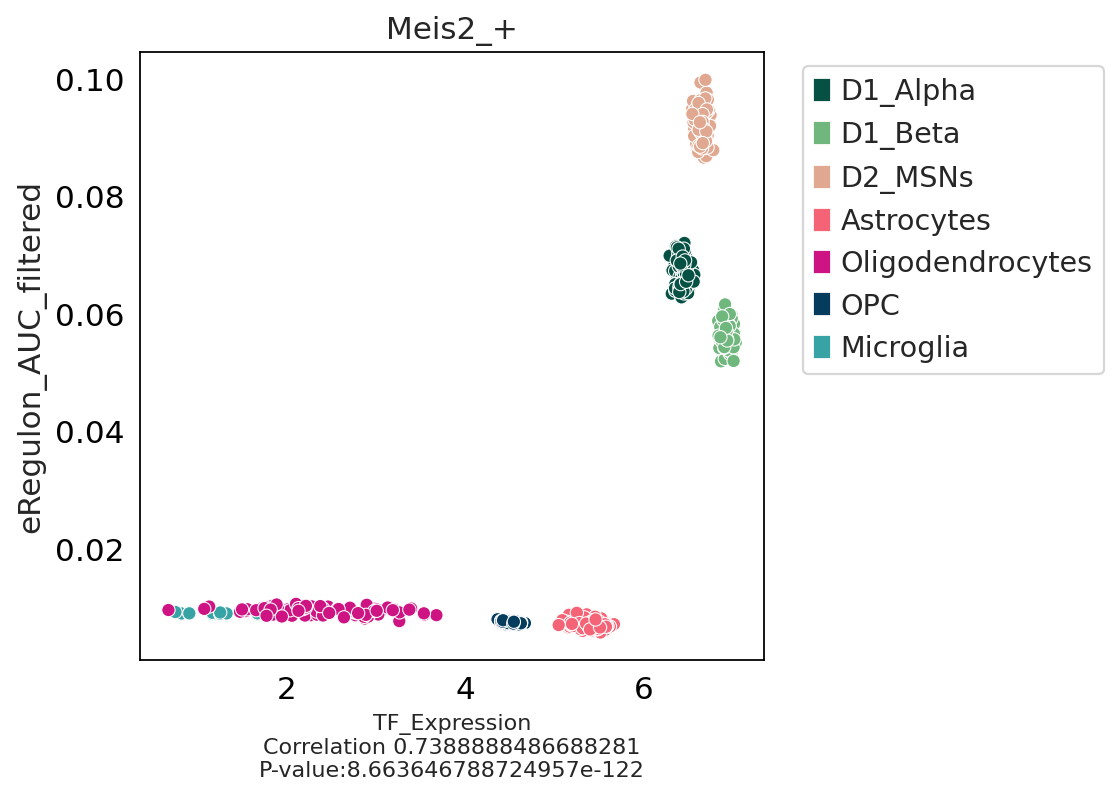

In [27]:
plt.close()
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))

prune_plot(scplus_obj,
           'Meis2_+',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)

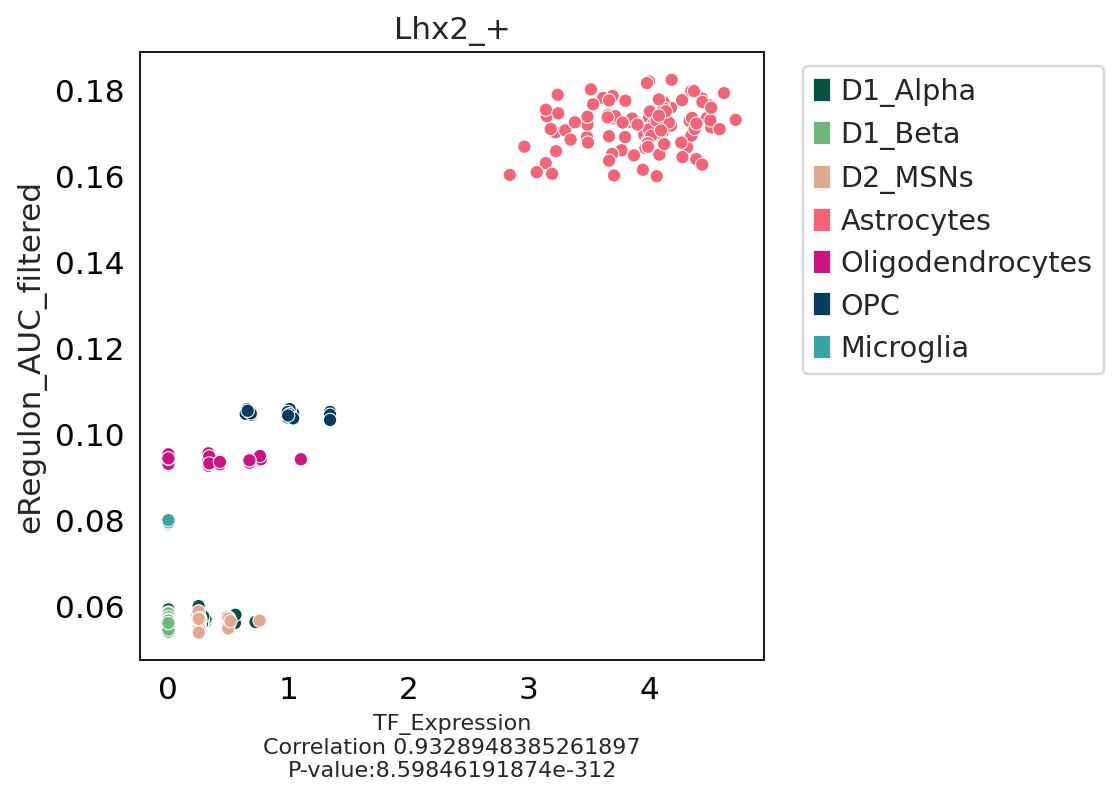

In [30]:
plt.close()
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))

prune_plot(scplus_obj,
           'Lhx2_+',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)

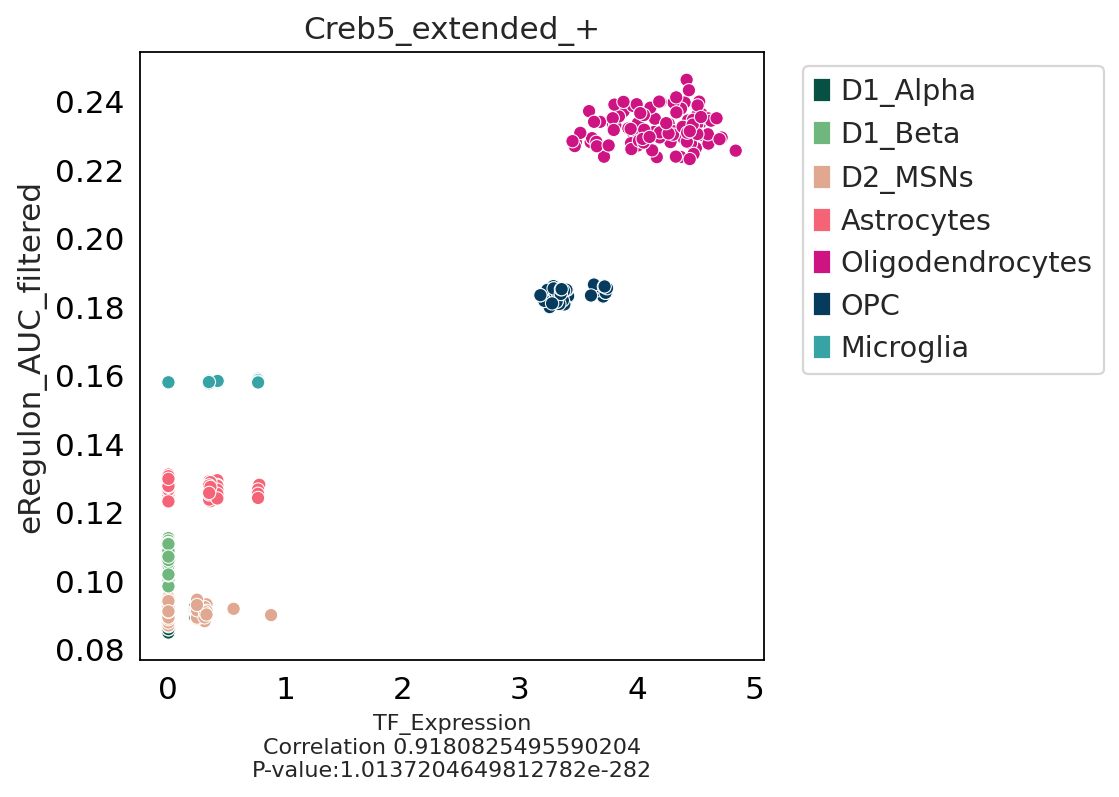

In [34]:
plt.close()
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))


prune_plot(scplus_obj,
           'Creb5_extended_+',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)

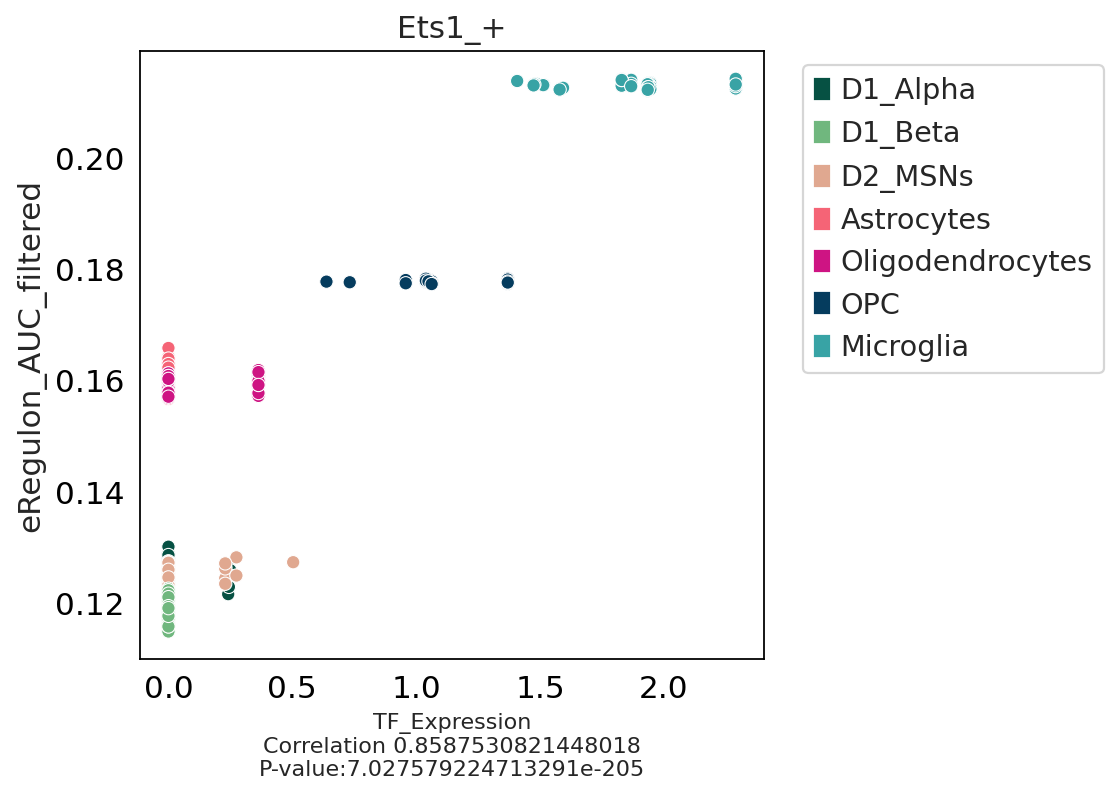

In [35]:
# Microglia
fig, axs = plt.subplots(ncols=1, figsize = (5, 5))


prune_plot(scplus_obj,
           'Ets1_+',
           pseudobulk_variable = 'Identities',
           show_dot_plot = True,
           show_line_plot = False,
           color_dict = color_dict,
           use_pseudobulk = True,
           auc_key = 'eRegulon_AUC_filtered',
           signature_key = 'Region_based',
           ax = axs,
           seed=555)
plt.grid(visible=False)
# plt.savefig(os.path.join(fig2_savedir, 'Ets1_+_gene_based_newcolors.svg'), format='svg')
# plt.savefig(os.path.join(fig2_savedir, 'Ets1_+_region_based_newcolors.svg'), format='svg')

In [7]:
eregulons_metadata = scplus_obj.uns['eRegulon_metadata_filtered']

isl1_minus = eregulons_metadata[eregulons_metadata['Region_signature_name'].str.contains('Isl1_extended_-')]
isl1_minus_drd2 = isl1_minus[isl1_minus['Gene'].str.contains('Drd2')]
isl1_minus_drd2

Region_signature_name    Gene_signature_name    TF is_extended  \
3  Isl1_extended_-_(40r)  Isl1_extended_-_(27g)  Isl1        True   
4  Isl1_extended_-_(40r)  Isl1_extended_-_(27g)  Isl1        True   

                   Region  Gene  R2G_importance   R2G_rho  \
3  chr9:49386093-49386580  Drd2        0.041403  0.797386   
4  chr9:49389443-49389909  Drd2        0.069343  0.789333   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
3              0.033014                  0.033014        71.660143   
4              0.054735                  0.054735        71.660143   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
3               -1 -0.508521                 -36.440695   
4               -1 -0.508521                 -36.440695   

   TF2G_importance_x_rho Consensus_name  
3              36.440695       Isl1_-_+  
4              36.440695       Isl1_-_+

In [11]:
eregulons_metadata = scplus_obj.uns['eRegulon_metadata_filtered']

isl1_plus = eregulons_metadata[eregulons_metadata['Region_signature_name'].str.contains('Isl1_extended_+')]
isl1_plus_drd1a = isl1_plus[isl1_plus['Gene'].str.contains('Drd1')]
isl1_plus_drd1a

Region_signature_name     Gene_signature_name    TF is_extended  \
407  Isl1_extended_+_(741r)  Isl1_extended_+_(631g)  Isl1        True   

                      Region   Gene  R2G_importance   R2G_rho  \
407  chr13:54030343-54031396  Drd1a        0.064422  0.809695   

     R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
407              0.052162                  0.052162        98.514409   

     TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
407                1  0.832443                  82.007655   

     TF2G_importance_x_rho Consensus_name  
407              82.007655       Isl1_+_+

In [9]:
eregulons_metadata = scplus_obj.uns['eRegulon_metadata']

isl1_minus_meis2_plus = eregulons_metadata[eregulons_metadata['Region_signature_name'].str.contains('_+')]
isl1_minus_meis2_plus_drd2 = isl1_minus_meis2_plus[(isl1_minus_meis2_plus['Gene'].str.contains('Drd2')) & (isl1_minus_meis2_plus['TF'].isin(['Meis2', 'Isl1']))]
isl1_minus_meis2_plus_drd2

Region_signature_name      Gene_signature_name     TF is_extended  \
247         Meis2_+_+_(351r)         Meis2_+_+_(403g)  Meis2       False   
248         Meis2_+_+_(351r)         Meis2_+_+_(403g)  Meis2       False   
249         Meis2_+_+_(351r)         Meis2_+_+_(403g)  Meis2       False   
3    Isl1_extended_-_+_(40r)  Isl1_extended_-_+_(27g)   Isl1        True   
4    Isl1_extended_-_+_(40r)  Isl1_extended_-_+_(27g)   Isl1        True   

                     Region  Gene  R2G_importance   R2G_rho  \
247  chr9:49408345-49408833  Drd2        0.072805  0.788556   
248  chr9:49386093-49386580  Drd2        0.041403  0.797386   
249  chr9:49409367-49409797  Drd2        0.044044  0.770155   
3    chr9:49386093-49386580  Drd2        0.041403  0.797386   
4    chr9:49389443-49389909  Drd2        0.069343  0.789333   

     R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
247              0.057411                  0.057411        10.783534   
248              0.033014                  0.033014        10.783534   
249              0.033921                  0.033921        10.783534   
3                0.033014                  0.033014        71.660143   
4                0.054735                  0.054735        71.660143   

     TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
247                1  0.454165                   4.897505   
248                1  0.454165                   4.897505   
249                1  0.454165                   4.897505   
3                 -1 -0.508521                 -36.440695   
4                 -1 -0.508521                 -36.440695   

     TF2G_importance_x_rho  
247               4.897505  
248               4.897505  
249               4.897505  
3                36.440695  
4                36.440695

# Intersect filtered eRegulon with filtered peaks
## Corresponds to section "2.8. Putative gene regulatory element identification" in manuscript

In [ ]:
eregulons_metadata = scplus_obj.uns['eRegulon_metadata_filtered']

In [ ]:
# Save 'filtered' eRegulons as csv file
eregulons_metadata.to_csv('/n/scratch3/users/x/xl266/nucleus_accumbens_final_plots/fig2/eregulons_metadata_filtered.csv')

In [ ]:
import pandas as pd
import pyranges as pr
peak_gene_links = "/n/scratch3/users/p/pab1164/NAc/Supp_Table3_peak_gene_corr.csv"
peak_gene_links_df = pd.read_csv(peak_gene_links, index_col = 0)

In [ ]:
# Convert to 0-based, half closed
peak_gene_links_df['peak.start'] = peak_gene_links_df['peak.start'] - 1

# only positive R2G relationships are kept after filtering
eRegulon_metadata_filt = scplus_obj.uns['eRegulon_metadata_filtered'].copy()

In [ ]:
# Prepare eRegulon input for pybedtools intersect

# Create Chromosome, Start, End columns
eRegulon_metadata_filt['chrom'] = eRegulon_metadata_filt['Region'].apply(lambda x: x.split(':')[0])
eRegulon_metadata_filt['start'] = eRegulon_metadata_filt['Region'].apply(lambda x: x.split(':')[1].split('-')[0])
eRegulon_metadata_filt['end'] = eRegulon_metadata_filt['Region'].apply(lambda x: x.split(':')[1].split('-')[1])


# https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
chrom_regulon = eRegulon_metadata_filt.pop('chrom')
start_regulon = eRegulon_metadata_filt.pop('start')
end_regulon = eRegulon_metadata_filt.pop('end')

eRegulon_metadata_filt.insert(0, 'end', end_regulon)
eRegulon_metadata_filt.insert(0, 'start', start_regulon)
eRegulon_metadata_filt.insert(0, 'chrom', chrom_regulon)


eRegulon_metadata_filt = eRegulon_metadata_filt.astype('str')
eRegulon_metadata_filt = eRegulon_metadata_filt.astype({'start': 'int32'})
eRegulon_metadata_filt = eRegulon_metadata_filt.astype({'end': 'int32'})

regulon_rows_l = eRegulon_metadata_filt.values.tolist()
regulon_rows_l

In [ ]:
# Prepare peak gene links input for pybedtools intersect

# Create Chromosome, Start, End columns
# https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
chrom_regulon = peak_gene_links_df.pop('chromosome.y')
start_regulon = peak_gene_links_df.pop('peak.start')
end_regulon = peak_gene_links_df.pop('peak.end')

peak_gene_links_df.insert(0, 'end', end_regulon)
peak_gene_links_df.insert(0, 'start', start_regulon)
peak_gene_links_df.insert(0, 'chrom', chrom_regulon)


peak_gene_links_df = peak_gene_links_df.astype('str')
peak_gene_links_df = peak_gene_links_df.astype({'start': 'int32'})
peak_gene_links_df = peak_gene_links_df.astype({'end': 'int32'})

peak_gene_links_l = peak_gene_links_df.values.tolist()

In [ ]:
import pybedtools
bedtools_path = '/n/scratch3/users/x/xl266/atac/bedtools2/bin'
pybedtools.helpers.set_bedtools_path(path=bedtools_path)

filtered_regulon_rows_pybedtool = pybedtools.BedTool(regulon_rows_l)
peak_gene_pybedtool = pybedtools.BedTool(peak_gene_links_l)

intersect = peak_gene_pybedtool.intersect(filtered_regulon_rows_pybedtool, wao=True)
intersect_df = intersect.to_dataframe(disable_auto_names=True, header=None)


In [ ]:
intersect_df.columns = pd.concat([pd.Series(peak_gene_links_df.columns), pd.Series(eRegulon_metadata_filt.columns), pd.Series(['bp_overlap'])], ignore_index=True)

In [ ]:
# Only get overlaps
intersect_df_filt = intersect_df[intersect_df['bp_overlap'] != 0]

In [ ]:
intersect_df_filt_dedup = intersect_df_filt.drop_duplicates()    # sanity check, made no difference

In [ ]:
# Save 'consensus peaks' as csv
intersect_df_filt_dedup.to_csv(os.path.join(work_dir, 'regulon_peakgene_overlaps.csv'))

# Manually edit cisTopic function for topic-cell probability UMAP (scroll up)
## https://github.com/aertslab/pycisTopic/blob/master/pycisTopic/clust_vis.py

In [27]:
def plot_cistopic_metadata_no_grid(
    cistopic_obj: "CistopicObject",
    reduction_name: str,
    variables: List[str],
    target: Optional[str] = "cell",
    remove_nan: Optional[bool] = True,
    show_label: Optional[bool] = True,
    show_legend: Optional[bool] = False,
    cmap: Optional[Union[str, "matplotlib.cm"]] = cm.viridis,
    dot_size: Optional[int] = 10,
    text_size: Optional[int] = 10,
    alpha: Optional[Union[float, int]] = 1,
    seed: Optional[int] = 555,
    color_dictionary: Optional[Dict[str, str]] = {},
    figsize: Optional[Tuple[float, float]] = (6.4, 4.8),
    num_columns: Optional[int] = 1,
    selected_features: Optional[List[str]] = None,
    save: Optional[str] = None,
):
    """
    Plot categorical and continuous metadata into dimensionality reduction.
    Parameters
    ---------
    cistopic_obj: `class::CistopicObject`
            A cisTopic object with dimensionality reductions in `class::CistopicObject.projections`.
    reduction_name: str
            Name of the dimensionality reduction to use
    variables: list
            List of variables to plot. They should be included in `class::CistopicObject.cell_data` and `class::CistopicObject.region_data`, depending on which
            target is specified.
    target: str, optional
            Whether cells ('cell') or regions ('region') should be used. Default: 'cell'
    remove_nan: bool, optional
            Whether to remove data points for which the variable value is 'nan'. Default: True
    show_label: bool, optional
            For categorical variables, whether to show the label in the plot. Default: True
    show_legend: bool, optional
            For categorical variables, whether to show the legend next to the plot. Default: False
    cmap: str or 'matplotlib.cm', optional
            For continuous variables, color map to use for the legend color bar. Default: cm.viridis
    dot_size: int, optional
            Dot size in the plot. Default: 10
    text_size: int, optional
            For categorical variables and if show_label is True, size of the labels in the plot. Default: 10
    alpha: float, optional
            Transparency value for the dots in the plot. Default: 1
    seed: int, optional
            Random seed used to select random colors. Default: 555
    color_dictionary: dict, optional
            A dictionary containing an entry per variable, whose values are dictionaries with variable levels as keys and corresponding colors as values.
            Default: None
    figsize: tuple, optional
            Size of the figure. If num_columns is 1, this is the size for each figure; if num_columns is above 1, this is the overall size of the figure (if keeping
            default, it will be the size of each subplot in the figure). Default: (6.4, 4.8)
    num_columns: int, optional
            For multiplot figures, indicates the number of columns (the number of rows will be automatically determined based on the number of plots). Default: 1
    selected_features: list, optional
            A list with selected features (cells or regions) to plot. This is recommended when working with regions (e.g. selecting
            regions in binarized topics), as working with all regions can be time consuming. Default: None (use all features)
    save: str, optional
            Path to save plot. Default: None.
    """
    if target == "cell":
        data_mat = cistopic_obj.cell_data
    if target == "region":
        data_mat = cistopic_obj.region_data

    embedding = cistopic_obj.projections[target][reduction_name]

    if selected_features is not None:
        data_mat = data_mat.loc[selected_features]
        embedding = embedding.loc[selected_features]

    data_mat = data_mat.loc[embedding.index.to_list()]
    pdf = None
    if (save is not None) & (num_columns == 1):
        pdf = matplotlib.backends.backend_pdf.PdfPages(save)

    if num_columns > 1:
        num_rows = int(np.ceil(len(variables) / num_columns))
        if figsize == (6.4, 4.8):
            figsize = (6.4 * num_columns, 4.8 * num_rows)
        i = 1

    fig = plt.figure(figsize=figsize)

    for var in variables:
        var_data = data_mat.copy().loc[:, var].dropna().to_list()
        if isinstance(var_data[0], str):
            if (remove_nan) & (data_mat[var].isnull().sum() > 0):
                var_data = data_mat.copy().loc[:, var].dropna().to_list()
                emb_nan = embedding.loc[
                    data_mat.copy().loc[:, var].dropna().index.tolist()
                ]
                label_pd = pd.concat(
                    [emb_nan, data_mat.loc[:, [var]].dropna()], axis=1, sort=False
                )
            else:
                var_data = (
                    data_mat.copy().astype(str).fillna("NA").loc[:, var].to_list()
                )
                label_pd = pd.concat(
                    [embedding, data_mat.astype(str).fillna("NA").loc[:, [var]]],
                    axis=1,
                    sort=False,
                )

            categories = set(var_data)
            try:
                color_dict = color_dictionary[var]
            except BaseException:
                random.seed(seed)
                color = list(
                    map(
                        lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),
                        range(len(categories)),
                    )
                )
                color_dict = dict(zip(categories, color))

            if num_columns > 1:
                plt.subplot(num_rows, num_columns, i)
                i = i + 1

            if (remove_nan) & (data_mat[var].isnull().sum() > 0):
                plt.scatter(
                    emb_nan.iloc[:, 0],
                    emb_nan.iloc[:, 1],
                    c=data_mat.loc[:, var].dropna().apply(lambda x: color_dict[x]),
                    s=dot_size,
                    alpha=alpha,
                )
                plt.xlabel(emb_nan.columns[0])
                plt.ylabel(emb_nan.columns[1])
            else:
                plt.scatter(
                    embedding.iloc[:, 0],
                    embedding.iloc[:, 1],
                    c=data_mat.astype(str)
                    .fillna("NA")
                    .loc[:, var]
                    .apply(lambda x: color_dict[x]),
                    s=dot_size,
                    alpha=alpha,
                )
                plt.xlabel(embedding.columns[0])
                plt.ylabel(embedding.columns[1])
                plt.grid(visible=False)   # ADDED

            if show_label:
                label_pos = label_pd.groupby(var).agg(
                    {label_pd.columns[0]: np.mean, label_pd.columns[1]: np.mean}
                )
                texts = []
                for label in label_pos.index.tolist():
                    texts.append(
                        plt.text(
                            label_pos.loc[label][0],
                            label_pos.loc[label][1],
                            label,
                            horizontalalignment="center",
                            verticalalignment="center",
                            size=text_size,
                            weight="bold",
                            color=color_dict[label],
                            path_effects=[
                                PathEffects.withStroke(linewidth=3, foreground="w")
                            ],
                        )
                    )
                adjust_text(texts)

            plt.title(var)
            patchList = []
            for key in color_dict:
                data_key = mpatches.Patch(color=color_dict[key], label=key)
                patchList.append(data_key)
            if show_legend:
                plt.legend(
                    handles=patchList, bbox_to_anchor=(1.04, 1), loc="upper left"
                )

            if num_columns == 1:
                if save is not None:
                    pdf.savefig(fig, bbox_inches="tight")
                plt.show()
        else:
            var_data = data_mat.copy().loc[:, var].to_list()
            o = np.argsort(var_data)
            if num_columns > 1:
                plt.subplot(num_rows, num_columns, i)
                i = i + 1
            plt.scatter(
                embedding.iloc[o, 0],
                embedding.iloc[o, 1],
                c=subset_list(var_data, o),
                cmap=cmap,
                s=dot_size,
                alpha=alpha,
            )
            plt.xlabel(embedding.columns[0])
            plt.ylabel(embedding.columns[1])
            plt.title(var)
            # setup the colorbar
            normalize = mcolors.Normalize(
                vmin=np.array(var_data).min(), vmax=np.array(var_data).max()
            )
            scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
            scalarmappaple.set_array(var_data)
            plt.colorbar(scalarmappaple)
            if num_columns == 1:
                if save is not None:
                    pdf.savefig(fig, bbox_inches="tight")
                plt.show()
    
    
    if num_columns > 1:
        plt.tight_layout()
        if save is not None:
            fig.savefig(save, bbox_inches="tight")
        plt.show()
    if (save is not None) & (num_columns == 1):
        pdf = pdf.close()


In [21]:
from scenicplus.dimensionality_reduction import *
def plot_eRegulon_nogrid(scplus_obj: SCENICPLUS,
                  reduction_name: str,
                  auc_key: Optional[str] = 'eRegulon_AUC',
                  signature_keys: Optional[List[str]] = ['Gene_based', 'Region_based'],
                  normalize_tf_expression: Optional[bool] = True,
                  cmap: Optional[Union[str, 'matplotlib.cm']] = cm.viridis,
                  dot_size: Optional[int] = 10,
                  alpha: Optional[Union[float, int]] = 1,
                  scale: Optional[bool] = False,
                  selected_regulons: Optional[List[int]] = None,
                  selected_cells: Optional[List[str]] = None,
                  figsize: Optional[Tuple[float, float]] = (6.4, 4.8),
                  num_columns: Optional[int] = 3,
                  save: Optional[str] = None):
    """
    Plot TF expression and eRegulon AUC (gene and region based) into dimensionality reduction.

    Parameters
    ---------
    scplus_obj: `class::SCENICPLUS`
            A cisTopic object with dimensionality reductions in `class::CistopicObject.projections`.
    reduction_name: str
            Name of the dimensionality reduction to use
    auc_key: str, optional
            Key to extract AUC values from. Default: 'eRegulon_AUC'
    signature_keys: List, optional
            Keys to extract AUC values from. Default: ['Gene_based', 'Region_based'] 
    normalize_tf_expression: bool, optional
            Whether logCPM normalize TF expression. Default: True    
    cmap: str or 'matplotlib.cm', optional
            For continuous variables, color map to use for the legend color bar. Default: cm.viridis
    dot_size: int, optional
            Dot size in the plot. Default: 10
    alpha: float, optional
            Transparency value for the dots in the plot. Default: 1
    scale: bool, optional
            Whether to scale the cell-topic or topic-regions contributions prior to plotting. Default: False
    selected_regulons: list, optional
            A list with selected regulons to be used for clustering. Default: None (use all regulons)
    selected_cells: list, optional
            A list with selected features cells to cluster. Default: None (use all cells)
    figsize: tuple, optional
            Size of the figure. If num_columns is 1, this is the size for each figure; if num_columns is above 1, this is the overall size of the figure (if keeping
            default, it will be the size of each subplot in the figure). Default: (6.4, 4.8)
    num_columns: int, optional
            For multiplot figures, indicates the number of columns (the number of rows will be automatically determined based on the number of plots). Default: 1
    save: str, optional
            Path to save plot. Default: None.
    """

    embedding = scplus_obj.dr_cell[reduction_name].copy()

    if scale:
        data_mat = pd.concat([pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(
            scplus_obj.uns[auc_key][x].T), index=scplus_obj.uns[auc_key][x].T.index.to_list(), columns=scplus_obj.uns[auc_key][x].T.columns) for x in signature_keys])
    else:
        data_mat = pd.concat([scplus_obj.uns[auc_key][x]
                             for x in signature_keys]).T
    data_names = data_mat.columns.tolist()

    if selected_cells is not None:
        data_mat = data_mat[selected_cells]
        data_names = selected_cells

    if selected_regulons is None:
        selected_regulons = [x.rsplit('_', 1)[0] for x in data_mat.index]

    if (save is not None) & (num_columns == 1):
        pdf = matplotlib.backends.backend_pdf.PdfPages(save)

    if num_columns > 1:
        num_rows = int(np.ceil(len(selected_regulons)))
        if figsize == (6.4, 4.8):
            figsize = (6.4 * num_columns, 4.8 * num_rows)
        i = 1

    fig = plt.figure(figsize=figsize)

    dgem = pd.DataFrame(scplus_obj.X_EXP, index=scplus_obj.cell_names,
                        columns=scplus_obj.gene_names).copy()

    if normalize_tf_expression:
        dgem = dgem.T / dgem.T.sum(0) * 10**6
        dgem = np.log1p(dgem).T
    dgem = dgem.T
    data_mat = data_mat.T.fillna(0)
    for regulon in selected_regulons:
        tf_name = regulon.split('_')[0]
        regulon_names = data_mat.columns[data_mat.columns.str.contains(
            regulon + '_(', regex=False)]
        gene_based_name = regulon_names[regulon_names.str.contains(
            'g)', regex=False)]
        region_based_name = regulon_names[regulon_names.str.contains(
            'r)', regex=False)]
        if tf_name in dgem.index:
            # TF expression
            tf_expr = dgem.loc[tf_name]
            tf_expr = tf_expr.sort_values()
            embedding_plot = embedding.loc[tf_expr.index.tolist()]
            o = np.argsort(tf_expr)
            if num_columns > 1:
                plt.subplot(num_rows, num_columns, i)
                i = i + 1
            if not scale:
                plt.scatter(embedding_plot.iloc[o, 0], embedding_plot.iloc[o, 1], c=subset_list(
                    tf_expr, o), cmap=cmap, s=dot_size, alpha=alpha, vmin=0, vmax=max(tf_expr))
                normalize = mcolors.Normalize(
                    vmin=0, vmax=np.array(tf_expr).max())
            else:
                plt.scatter(embedding_plot.iloc[o, 0], embedding_plot.iloc[o, 1], c=subset_list(
                    tf_expr, o), cmap=cmap, s=dot_size, alpha=alpha)
                normalize = mcolors.Normalize(
                    vmin=np.array(tf_expr).min(),
                    vmax=np.array(tf_expr).max())
            plt.xlabel(embedding_plot.columns[0])
            plt.ylabel(embedding_plot.columns[1])
            plt.title(tf_name+'_expression')
            
            plt.grid(visible=False)   # ADDED
            
            
            # setup the colorbar
            scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
            scalarmappaple.set_array(tf_expr)
            plt.colorbar(scalarmappaple)
            if num_columns == 1:
                if save is not None:
                    pdf.savefig(fig, bbox_inches='tight')
                plt.show()
            # Gene data
            if num_columns > 1:
                plt.subplot(num_rows, num_columns, i)
                i = i + 1
            if 'Gene_based' in signature_keys:
                gene_data = data_mat[gene_based_name].squeeze()
                gene_data = gene_data.sort_values()
                embedding_plot = embedding.loc[gene_data.index.tolist()]
                o = np.argsort(gene_data)
                if not scale:
                    plt.scatter(embedding_plot.iloc[o, 0], embedding_plot.iloc[o, 1], c=subset_list(
                        gene_data, o), cmap=cmap, s=dot_size, alpha=alpha, vmin=0, vmax=max(gene_data))
                    normalize = mcolors.Normalize(
                        vmin=0, vmax=np.array(gene_data).max())
                else:
                    plt.scatter(embedding_plot.iloc[o, 0], embedding_plot.iloc[o, 1], c=subset_list(
                        gene_data, o), cmap=cmap, s=dot_size, alpha=alpha)
                    normalize = mcolors.Normalize(
                        vmin=np.array(gene_data).min(),
                        vmax=np.array(gene_data).max())
                plt.xlabel(embedding_plot.columns[0])
                plt.ylabel(embedding_plot.columns[1])
                plt.title(gene_based_name[0])
                
                plt.grid(visible=False)   # ADDED
                
                # setup the colorbar
                scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
                scalarmappaple.set_array(gene_data)
                plt.colorbar(scalarmappaple)
                if num_columns == 1:
                    if save is not None:
                        pdf.savefig(fig, bbox_inches='tight')
                    plt.show()
            else:
                plt.figure()
            # Region data
            if num_columns > 1:
                plt.subplot(num_rows, num_columns, i)
                i = i + 1
            if 'Region_based' in signature_keys:
                region_data = data_mat[region_based_name].squeeze()
                region_data = region_data.sort_values()
                embedding_plot = embedding.loc[region_data.index.tolist()]
                o = np.argsort(region_data)
                if not scale:
                    plt.scatter(embedding_plot.iloc[o, 0], embedding_plot.iloc[o, 1], c=subset_list(
                        region_data, o), cmap=cmap, s=dot_size, alpha=alpha, vmin=0, vmax=max(region_data))
                    normalize = mcolors.Normalize(
                        vmin=0, vmax=np.array(region_data).max())
                else:
                    plt.scatter(embedding_plot.iloc[o, 0], embedding_plot.iloc[o, 1], c=subset_list(
                        region_data, o), cmap=cmap, s=dot_size, alpha=alpha)
                    normalize = mcolors.Normalize(
                        vmin=np.array(region_data).min(),
                        vmax=np.array(region_data).max())
                plt.xlabel(embedding_plot.columns[0])
                plt.ylabel(embedding_plot.columns[1])
                plt.title(region_based_name[0])
                
                plt.grid(visible=False)   # ADDED
                
                # setup the colorbar
                scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
                scalarmappaple.set_array(region_data)
                plt.colorbar(scalarmappaple)
                if num_columns == 1:
                    if save is not None:
                        pdf.savefig(fig, bbox_inches='tight')
                    plt.show()
            else:
                plt.figure()

    if num_columns > 1:
        plt.tight_layout()
        if save is not None:
            fig.savefig(save, bbox_inches='tight')
        plt.show()

    if (save is not None) & (num_columns == 1):
        pdf.close()